# Exploratory Data Analysis for Real Estate Price Prediction Model

В данном ноутбуке произведен анализ датасета, используемого для разработки модели предсказания цен на недвижимость в рамках соревнования на [Kaggle](https://www.kaggle.com/c/realestatepriceprediction) (ссылка на [датасет](https://www.kaggle.com/anastasiaplavina/realestate2020)).

## Описание датасета:

### Data fields
- **Id** - идентификационный номер квартиры
- **District Id** - идентификационный номер района
- **Rooms** - количество комнат
- **Square** - площадь
- **LifeSquare** - жилая площадь
- **KitchenSquare** - площадь кухни
- **Floor** - этаж
- **HouseFloor** - количество этажей в доме
- **HouseYear** - год постройки дома
- **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
- **Social_1, Social_2, Social_3** - социальные показатели местности
- **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
- **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
- **Price** - цена квартиры 

In [1]:
import gc
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
path_train = 'train.csv'

df = pd.read_csv(path_train)
X = df.drop('Price', axis=1)
y = df[['Price']]
X.set_index('Id', inplace=True)


del df
gc.collect()  

0

### Обзор целевой переменной


In [3]:
y.describe()

Price
count   10000.000000
mean   214138.857399
std     92872.293865
min     59174.778028
25%    153872.633942
50%    192269.644879
75%    249135.462171
max    633233.466570

In [4]:
target_mean = y['Price'].mean()
target_median = y['Price'].median()

target_mean, target_median

(214138.8573987384, 192269.64487934904)

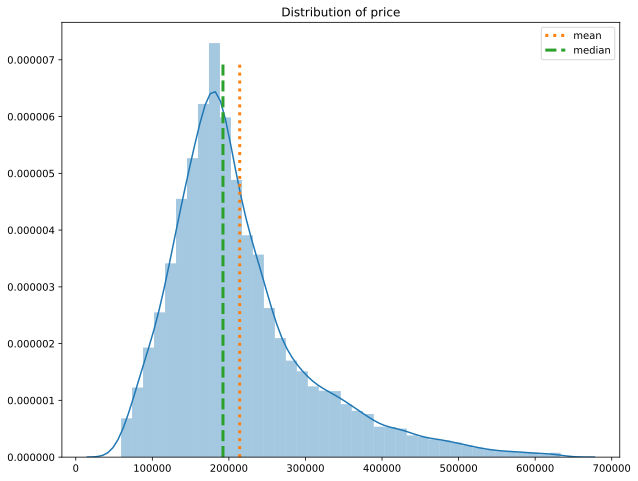

Skewness: 1.366877541125789
Kurtosis: 2.2494101342864057


In [5]:
plt.figure(figsize = (10, 8))
sns.distplot(y, bins=40)

n = np.linspace(0, 0.000007, 100)
plt.plot([target_mean] * 100, n, label='mean', linestyle=':', linewidth=3)
plt.plot([target_median] * 100, n, label='median', linestyle='--', linewidth=3)


plt.title('Distribution of price')
plt.legend()
plt.show()
print(f'Skewness: {y.skew()[0]}')
print(f'Kurtosis: {y.kurt()[0]}')

### Обзор признаков

In [6]:
X.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

### Обзор количественных признаков

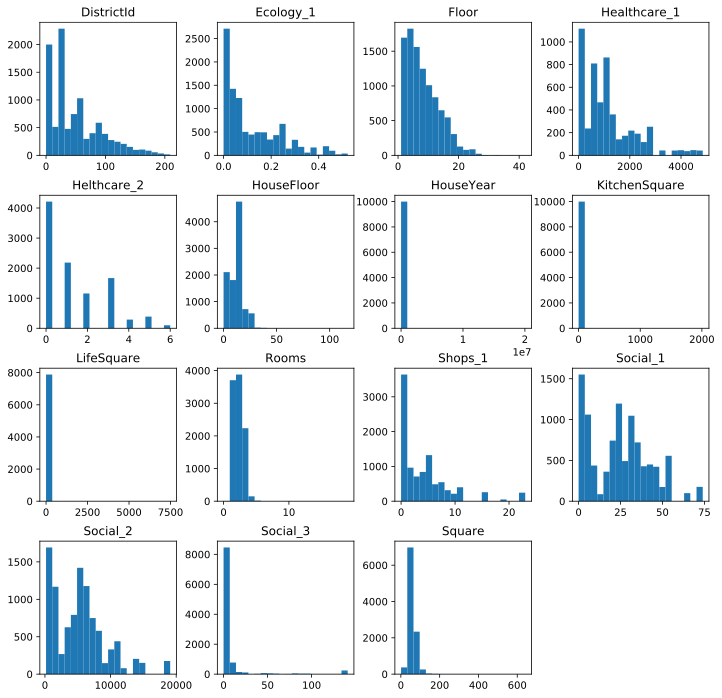

In [7]:
X_num_features = X.select_dtypes(exclude='object')

X_num_features.hist(figsize=(12,12), bins=20, grid=False)
plt.show()

In [8]:
X['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [9]:
X['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

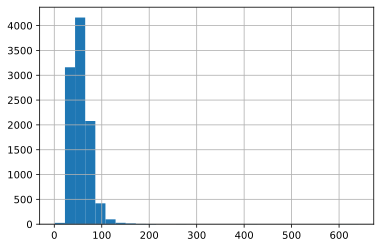

In [10]:
X['Square'].hist(bins=30)

In [11]:
X['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

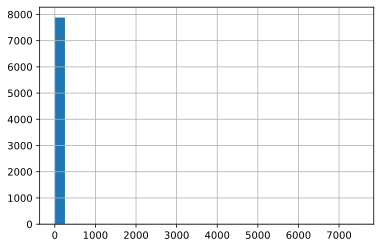

In [12]:
X['LifeSquare'].hist(bins=30)

In [13]:
X['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

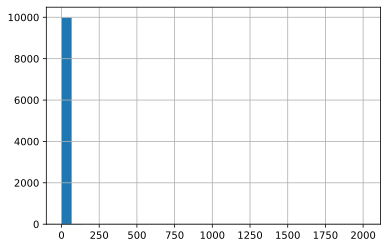

In [14]:
X['KitchenSquare'].hist(bins=30)

### Обзор категориальных признаков

**District Id**

In [15]:
np.sort(X['DistrictId'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
X['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
205      1
174      1
209      1
207      1
Name: DistrictId, Length: 205, dtype: int64

**Floor**

In [17]:
X['Floor'].value_counts()

4     949
5     876
3     872
6     802
7     759
8     643
9     604
2     588
10    553
11    457
12    438
13    398
14    362
16    290
15    287
17    256
1     235
18    185
19    121
20     68
21     59
22     54
24     53
25     34
23     25
26     18
27      5
28      3
32      2
42      1
33      1
37      1
31      1
Name: Floor, dtype: int64

In [18]:
np.sort(X['Floor'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

**HouseFloor**

In [19]:
X['HouseFloor'].value_counts()

17.0     2331
9.0      1389
12.0     1074
5.0      1031
14.0      625
16.0      576
1.0       497
25.0      374
22.0      343
0.0       269
24.0      176
8.0       141
10.0      135
4.0       134
3.0       127
15.0      123
19.0      108
20.0      105
18.0       89
7.0        59
6.0        58
2.0        48
23.0       40
21.0       33
11.0       28
13.0       27
30.0       21
40.0        7
27.0        6
37.0        4
32.0        4
28.0        3
48.0        2
99.0        2
39.0        2
117.0       1
29.0        1
31.0        1
38.0        1
44.0        1
36.0        1
26.0        1
45.0        1
47.0        1
Name: HouseFloor, dtype: int64

In [20]:
np.sort(X['HouseFloor'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

**HouseYear**

In [21]:
np.sort(X['HouseYear'].unique())

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [22]:
X['HouseYear'].value_counts()

1977        2652
2017         308
2016         305
2015         299
2014         210
            ... 
1947           1
1916           1
1910           1
1928           1
20052011       1
Name: HouseYear, Length: 97, dtype: int64

**Social_1**

In [23]:
np.sort(X['Social_1'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 41, 42, 43, 46, 47, 49, 50, 52, 53, 66, 74])

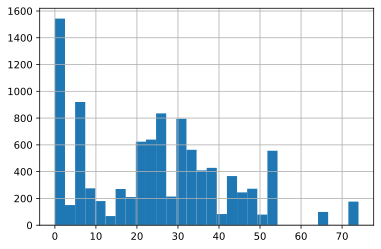

In [24]:
X['Social_1'].hist(bins=30)

**Social_2**

In [25]:
np.sort(X['Social_2'].unique())

array([  168,   186,   264,   290,   388,   469,   475,   507,   528,
         568,   629,   662,   760,   915,  1135,  1227,  1318,  1423,
        1437,  1497,  1564,  1660,  1768,  1892,  1952,  1986,  2270,
        2277,  2370,  2398,  2423,  2514,  2733,  2738,  2748,  2787,
        2810,  2940,  3079,  3097,  3151,  3293,  3369,  3374,  3379,
        3433,  3478,  3594,  3681,  3684,  3746,  3806,  3856,  3889,
        3893,  3975,  4017,  4048,  4231,  4346,  4378,  4386,  4439,
        4472,  4583,  4625,  4635,  4724,  4756,  4788,  4789,  4798,
        4860,  5011,  5027,  5048,  5067,  5148,  5212,  5261,  5285,
        5288,  5469,  5487,  5562,  5569,  5613,  5648,  5664,  5731,
        5735,  5776,  5889,  5992,  6119,  6137,  6141,  6149,  6207,
        6398,  6533,  6558,  6564,  6566,  6714,  6746,  6748,  6783,
        6856,  7010,  7065,  7077,  7227,  7287,  7425,  7538,  7614,
        7651,  7687,  7715,  7759,  7960,  7976,  8004,  8429,  8647,
        8667,  9292,

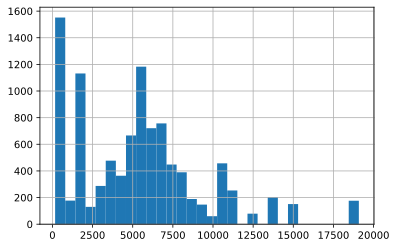

In [26]:
X['Social_2'].hist(bins=30)

**Social_3**

In [27]:
np.sort(X['Social_3'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  14,
        16,  19,  20,  23,  24,  27,  37,  39,  45,  48,  56,  59,  73,
        84,  87,  93, 141])

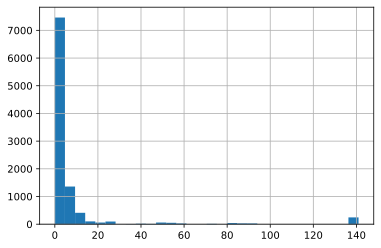

In [28]:
X['Social_3'].hist(bins=30)

**Shops_1**

In [29]:
np.sort(X['Shops_1'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 15, 16, 19, 23])

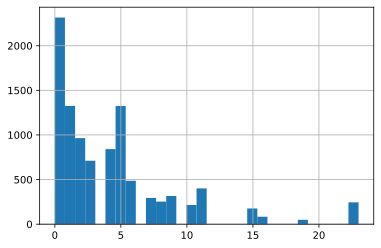

In [30]:
X['Shops_1'].hist(bins=30)

**Healthcare_2**

In [31]:
np.sort(X['Helthcare_2'].unique())

array([0, 1, 2, 3, 4, 5, 6])

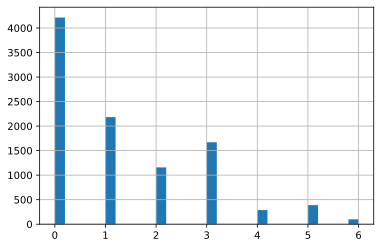

In [32]:
X['Helthcare_2'].hist(bins=30)

**Ecology_1**

In [33]:
X['Ecology_1'].describe()

count    10000.000000
mean         0.118858
std          0.119025
min          0.000000
25%          0.017647
50%          0.075424
75%          0.195781
max          0.521867
Name: Ecology_1, dtype: float64

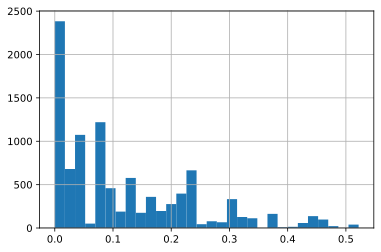

In [34]:
X['Ecology_1'].hist(bins=30)

### Бинарные признаки

**Ecology_2, Ecology_3**

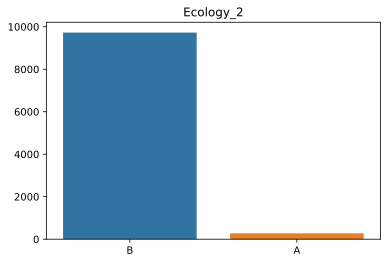

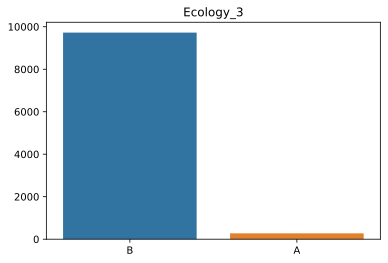

In [35]:
counts = X['Ecology_2'].value_counts()
counts = X['Ecology_3'].value_counts()


plt.figure(figsize=(6,4))    
plt.title('Ecology_2')
sns.barplot(counts.index, counts.values)


plt.figure(figsize=(6,4))    
plt.title('Ecology_3')
sns.barplot(counts.index, counts.values)
plt.show()

plt.show()

**Shops_2**

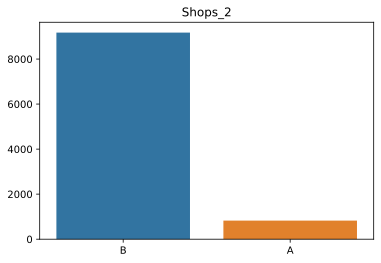

In [36]:
counts = X['Shops_2'].value_counts()


plt.figure(figsize=(6,4))    
plt.title('Shops_2')
sns.barplot(counts.index, counts.values)
plt.show()

### Выбросы

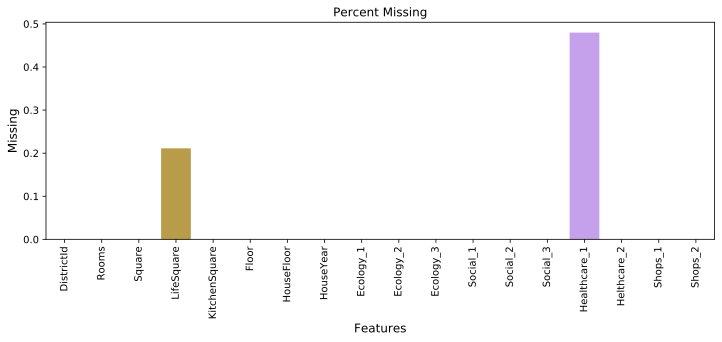

In [37]:
nan_df = (X.isna().sum() / X.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(12,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()


## Анализ зависимости фичей от таргета

### Матрица корреляций

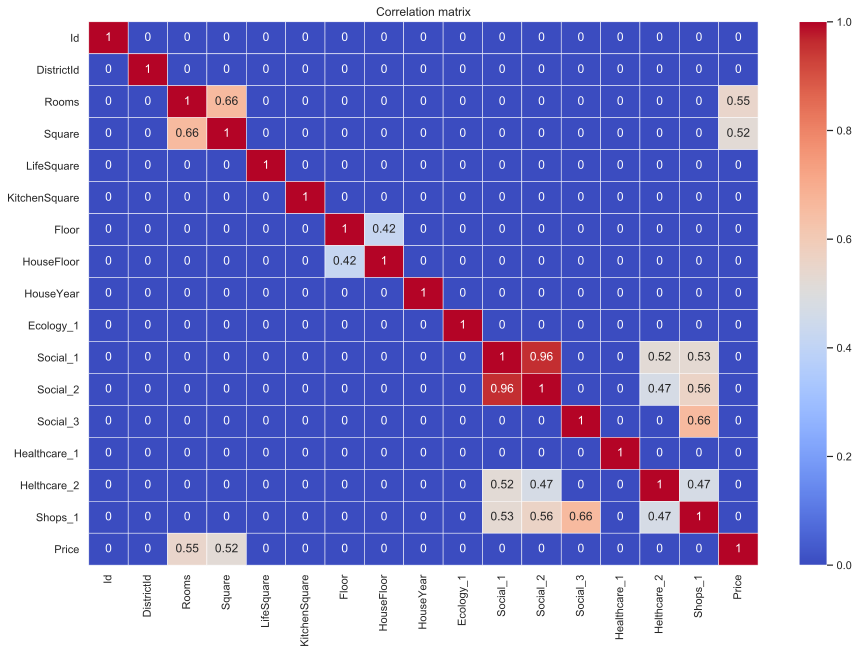

In [38]:
plt.figure(figsize = (15,10))
sns.set(font_scale=1)

df_corr = pd.read_csv(path_train)
corr_matrix = df_corr.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.4] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

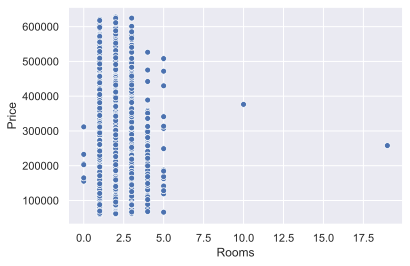

In [39]:
sns.scatterplot(X['Rooms'], y['Price'])
plt.show()

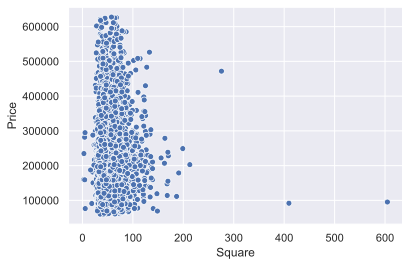

In [40]:
sns.scatterplot(X['Square'], y['Price'])
plt.show()

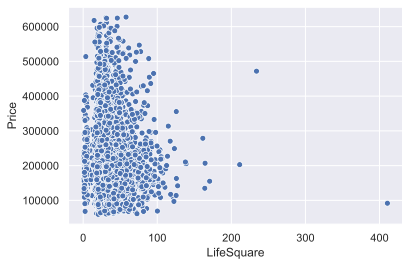

In [41]:
sns.scatterplot(X['LifeSquare'], y['Price'])
plt.show()

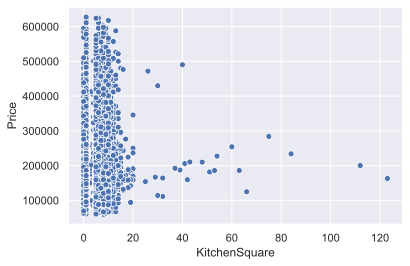

In [42]:
sns.scatterplot(X['KitchenSquare'], y['Price'])
plt.show()

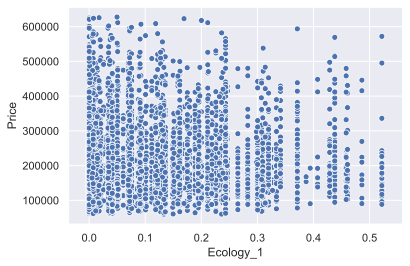

In [43]:
sns.scatterplot(X['Ecology_1'], y['Price'])
plt.show()

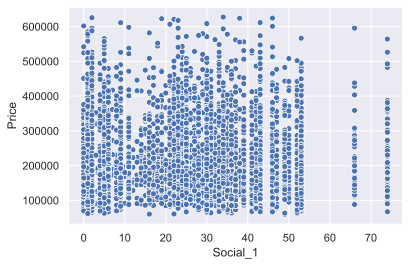

In [44]:
sns.scatterplot(X['Social_1'], y['Price'])
plt.show()

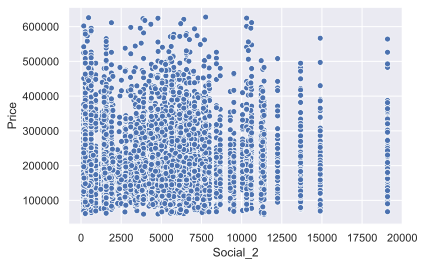

In [45]:
sns.scatterplot(X['Social_2'], y['Price'])
plt.show()

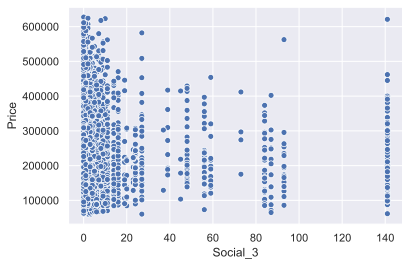

In [46]:
sns.scatterplot(X['Social_3'], y['Price'])
plt.show()

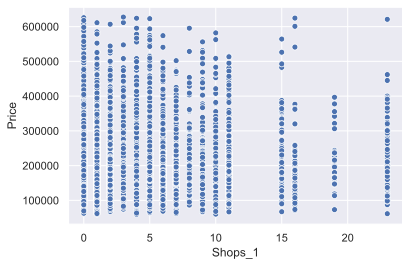

In [47]:
sns.scatterplot(X['Shops_1'], y['Price'])
plt.show()